In [1]:
import torch
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
!type ex1data1.txt

6.1101,17.592
5.5277,9.1302
8.5186,13.662
7.0032,11.854
5.8598,6.8233
8.3829,11.886
7.4764,4.3483
8.5781,12
6.4862,6.5987
5.0546,3.8166
5.7107,3.2522
14.164,15.505
5.734,3.1551
8.4084,7.2258
5.6407,0.71618
5.3794,3.5129
6.3654,5.3048
5.1301,0.56077
6.4296,3.6518
7.0708,5.3893
6.1891,3.1386
20.27,21.767
5.4901,4.263
6.3261,5.1875
5.5649,3.0825
18.945,22.638
12.828,13.501
10.957,7.0467
13.176,14.692
22.203,24.147
5.2524,-1.22
6.5894,5.9966
9.2482,12.134
5.8918,1.8495
8.2111,6.5426
7.9334,4.5623
8.0959,4.1164
5.6063,3.3928
12.836,10.117
6.3534,5.4974
5.4069,0.55657
6.8825,3.9115
11.708,5.3854
5.7737,2.4406
7.8247,6.7318
7.0931,1.0463
5.0702,5.1337
5.8014,1.844
11.7,8.0043
5.5416,1.0179
7.5402,6.7504
5.3077,1.8396
7.4239,4.2885
7.6031,4.9981
6.3328,1.4233
6.3589,-1.4211
6.2742,2.4756
5.6397,4.6042
9.3102,3.9624
9.4536,5.4141
8.8254,5.1694
5.1793,-0.74279
21.279,17.929
14.908,12.054
18.959,17.054
7.2182,4.8852
8.2951,5.7442
10.236,7.7754
5.4994,1.0173
20.341,20.992
10.136,6.6799
7.3345,4.02

In [3]:
datafile = 'ex1data1.txt'
cols = np.loadtxt(datafile, delimiter=',', usecols=(0,1))
cols = cols.T
cols.shape, cols

((2, 97), array([[ 6.1101 ,  5.5277 ,  8.5186 ,  7.0032 ,  5.8598 ,  8.3829 ,
          7.4764 ,  8.5781 ,  6.4862 ,  5.0546 ,  5.7107 , 14.164  ,
          5.734  ,  8.4084 ,  5.6407 ,  5.3794 ,  6.3654 ,  5.1301 ,
          6.4296 ,  7.0708 ,  6.1891 , 20.27   ,  5.4901 ,  6.3261 ,
          5.5649 , 18.945  , 12.828  , 10.957  , 13.176  , 22.203  ,
          5.2524 ,  6.5894 ,  9.2482 ,  5.8918 ,  8.2111 ,  7.9334 ,
          8.0959 ,  5.6063 , 12.836  ,  6.3534 ,  5.4069 ,  6.8825 ,
         11.708  ,  5.7737 ,  7.8247 ,  7.0931 ,  5.0702 ,  5.8014 ,
         11.7    ,  5.5416 ,  7.5402 ,  5.3077 ,  7.4239 ,  7.6031 ,
          6.3328 ,  6.3589 ,  6.2742 ,  5.6397 ,  9.3102 ,  9.4536 ,
          8.8254 ,  5.1793 , 21.279  , 14.908  , 18.959  ,  7.2182 ,
          8.2951 , 10.236  ,  5.4994 , 20.341  , 10.136  ,  7.3345 ,
          6.0062 ,  7.2259 ,  5.0269 ,  6.5479 ,  7.5386 ,  5.0365 ,
         10.274  ,  5.1077 ,  5.7292 ,  5.1884 ,  6.3557 ,  9.7687 ,
          6.5159 ,  8.517

In [4]:
X = np.transpose(np.array(cols[:-1]))
X = torch.from_numpy(X)
y = torch.from_numpy(np.transpose(np.array(cols[-1:])))
num = y.size
X,y

(tensor([[ 6.1101],
         [ 5.5277],
         [ 8.5186],
         [ 7.0032],
         [ 5.8598],
         [ 8.3829],
         [ 7.4764],
         [ 8.5781],
         [ 6.4862],
         [ 5.0546],
         [ 5.7107],
         [14.1640],
         [ 5.7340],
         [ 8.4084],
         [ 5.6407],
         [ 5.3794],
         [ 6.3654],
         [ 5.1301],
         [ 6.4296],
         [ 7.0708],
         [ 6.1891],
         [20.2700],
         [ 5.4901],
         [ 6.3261],
         [ 5.5649],
         [18.9450],
         [12.8280],
         [10.9570],
         [13.1760],
         [22.2030],
         [ 5.2524],
         [ 6.5894],
         [ 9.2482],
         [ 5.8918],
         [ 8.2111],
         [ 7.9334],
         [ 8.0959],
         [ 5.6063],
         [12.8360],
         [ 6.3534],
         [ 5.4069],
         [ 6.8825],
         [11.7080],
         [ 5.7737],
         [ 7.8247],
         [ 7.0931],
         [ 5.0702],
         [ 5.8014],
         [11.7000],
         [ 5.5416],


In [81]:
from torch import nn
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.lr = nn.Linear(1,1)
        
    def forward(self, x):
        x = self.lr(x)
        return x

linear_model = LinearRegression()
if torch.cuda.is_available():
    linear_model = linear_model.cuda()

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear_model.parameters(), lr=1e-3, momentum=0.9)

In [82]:
oss = []
for epoch in range(1000):
    if torch.cuda.is_available():
        inputs = X.float().cuda()
        outputs = y.float().cuda()
    out = linear_model(inputs)
    loss = criterion(out, outputs)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print_loss = loss.data
    oss.append(loss.data.cpu().detach().numpy())
    if(epoch+1)%100==0 :
        print('epoch={}'.format(epoch+1))
        print('loss is {}'.format(print_loss))

epoch=100
loss is 10.029146194458008
epoch=200
loss is 9.46081256866455
epoch=300
loss is 9.193948745727539
epoch=400
loss is 9.067588806152344
epoch=500
loss is 9.007755279541016
epoch=600
loss is 8.979422569274902
epoch=700
loss is 8.966008186340332
epoch=800
loss is 8.959654808044434
epoch=900
loss is 8.956646919250488
epoch=1000
loss is 8.955223083496094


In [83]:
oss

[array(203.98383, dtype=float32),
 array(145.74292, dtype=float32),
 array(69.43443, dtype=float32),
 array(18.970922, dtype=float32),
 array(14.9832535, dtype=float32),
 array(46.858475, dtype=float32),
 array(84.974976, dtype=float32),
 array(101.98208, dtype=float32),
 array(88.68289, dtype=float32),
 array(56.0499, dtype=float32),
 array(24.802458, dtype=float32),
 array(11.140412, dtype=float32),
 array(17.893064, dtype=float32),
 array(35.345974, dtype=float32),
 array(49.412216, dtype=float32),
 array(50.86725, dtype=float32),
 array(39.92389, dtype=float32),
 array(24.297503, dtype=float32),
 array(13.154777, dtype=float32),
 array(11.345871, dtype=float32),
 array(17.314276, dtype=float32),
 array(25.235155, dtype=float32),
 array(29.30018, dtype=float32),
 array(27.17923, dtype=float32),
 array(20.745707, dtype=float32),
 array(14.151572, dtype=float32),
 array(10.906538, dtype=float32),
 array(11.896729, dtype=float32),
 array(15.348852, dtype=float32),
 array(18.391548, dty

In [84]:
linear_model.eval()

LinearRegression(
  (lr): Linear(in_features=1, out_features=1, bias=True)
)

In [85]:
predict = linear_model(X).cpu().detach().numpy()
predict

array([[ 3.4260433],
       [ 2.7361097],
       [ 6.2792463],
       [ 4.484044 ],
       [ 3.1295283],
       [ 6.11849  ],
       [ 5.0446153],
       [ 6.349732 ],
       [ 3.8715858],
       [ 2.175657 ],
       [ 2.9528987],
       [12.967004 ],
       [ 2.9805012],
       [ 6.148698 ],
       [ 2.869974 ],
       [ 2.5604277],
       [ 3.7284815],
       [ 2.2650974],
       [ 3.8045352],
       [ 4.5641255],
       [ 3.5196297],
       [20.200409 ],
       [ 2.6915674],
       [ 3.6819253],
       [ 2.7801783],
       [18.630762 ],
       [11.384327 ],
       [ 9.167868 ],
       [11.796581 ],
       [22.490313 ],
       [ 2.4099789],
       [ 3.9938405],
       [ 7.1435585],
       [ 3.1674368],
       [ 5.9149685],
       [ 5.585995 ],
       [ 5.778498 ],
       [ 2.8292224],
       [11.393805 ],
       [ 3.7142663],
       [ 2.5930054],
       [ 4.3410587],
       [10.057532 ],
       [ 3.0275314],
       [ 5.457225 ],
       [ 4.5905433],
       [ 2.1941376],
       [ 3.06

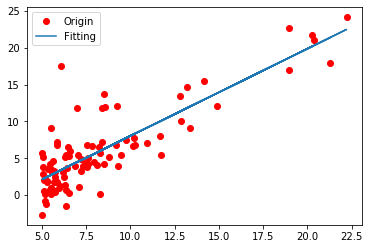

In [86]:
plt.plot(X.cpu().detach().numpy(), y.cpu().detach().numpy(), 'ro', label='Origin')
plt.plot(X.cpu().detach().numpy(), predict, label='Fitting')
plt.legend()
plt.show()

In [87]:
for i in linear_model.parameters():
    print(i)

Parameter containing:
tensor([[1.1846]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-3.8122], device='cuda:0', requires_grad=True)


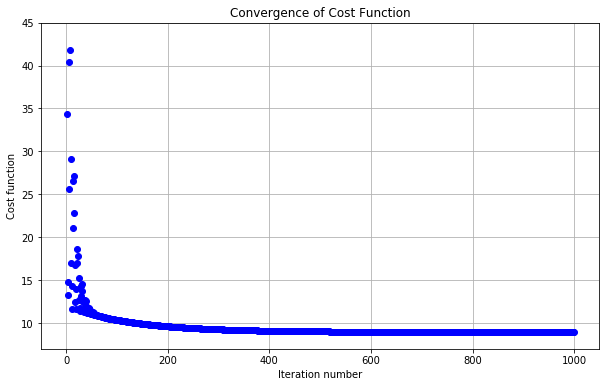

In [78]:
plt.figure(figsize=(10,6))
plt.plot(range(len(oss)),oss,'bo')
plt.grid(True)
plt.title("Convergence of Cost Function")
plt.xlabel("Iteration number")
plt.ylabel("Cost function")
dummy = plt.xlim([-0.05*epoch,1.05*epoch])
dummy = plt.ylim([7,45])